# Water Quality Analysis

In [3]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import skew
from scipy.stats import ttest_ind


import warnings
warnings.filterwarnings('ignore')

***We are going to analyze this dataset from Kaggle. We are trying to come up with
the key insights and recommendations for the Public Health Department to help them understand and take measures to improve the water quality.***

In [4]:
df = pd.read_csv('water_potability.csv')

In [5]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [11]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
# Data Cleaning
# From df.info(), we can see column 'ph', 'Sulfate', 'Trihalomethanes' have null values;
# Fill null values based on their skewness.

# list of cols need to clean
clean_list = ['ph', 'Sulfate', 'Trihalomethanes']

# create a function fill_with() to decide fillna with mean or median.
def fill_with(df, col_name):
    col = df[col_name]
    if abs(skew(col)) < 0.5:
        df[col_name] = col.fillna(col.mean())
    else:
        df[col_name] = col.fillna(col.median())
    return df
    
for col_name in clean_list:
    df = fill_with(df, col_name)

# check whether cleaning is done
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## **Descriptive Analysis**

## What is the distribution of pH values across the dataset?

Mean pH value: 7.074193521792814
Median pH value: 7.036752103833548
Standard Deviationof pH value: 1.4700400603035852


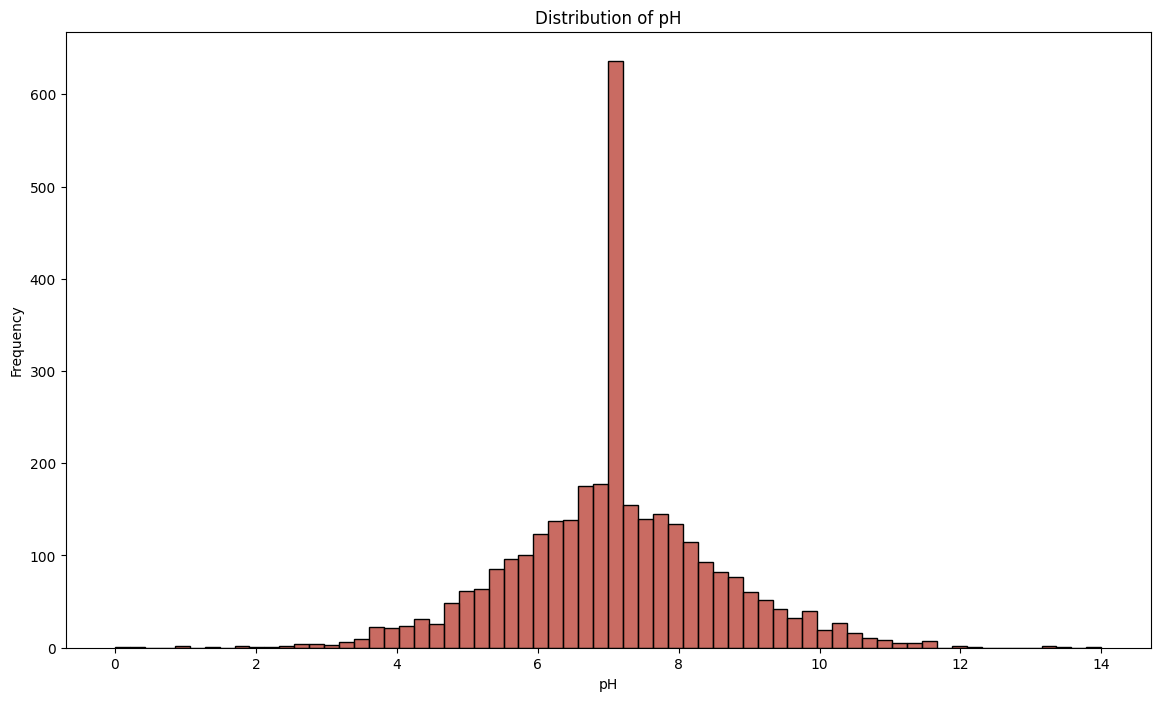

In [5]:
print('Mean pH value:', df['ph'].mean())
print('Median pH value:', df['ph'].median())
print('Standard Deviationof pH value:', df['ph'].std())

# visualization
plt.figure(figsize=(14,8))
sns.histplot(data=df['ph'], color='#B83A2D')
plt.title('Distribution of pH')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

**Most of ph value is around 7, which indicates most of water tested is between the normal range 6.5 to 8.5 recommended by WHO.**

## How does the hardness of water vary with its potability?

In [31]:
hardness_stats = df.groupby('Potability')['Hardness'].agg(['mean', 'std', 'min', 'max'])
hardness_stats

,mean,std,min,max
Potability,,,,
0,196.733292,31.057540,98.452931,304.235912
1,195.800744,35.547041,47.432000,323.124000


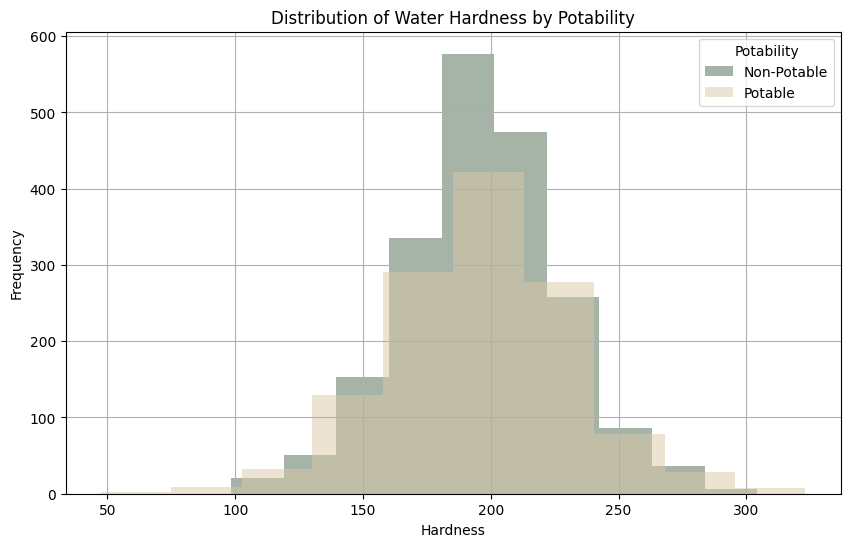

In [8]:
# Non-visualization
plt.figure(figsize=(10, 6))
colors = {1: '#dcc9a9', 0: '#4e6851'}  # set color
for label, df_group in df.groupby('Potability'):
    potability_label = 'Potable' if label == 1 else 'Non-Potable'   
    plt.hist(df_group['Hardness'], bins=10, alpha=0.5, label=potability_label, color=colors[label])

plt.title('Distribution of Water Hardness by Potability')
plt.xlabel('Hardness')
plt.ylabel('Frequency')
plt.legend(title='Potability')
plt.grid(True)
plt.show()

**Overall, the results suggest that water hardness does not show a strong or clear distinction between potable and non-potable water.**

## What is the correlation between Conductivity and Total Dissolved Solids (TDS)?

In [22]:
correlation_matrix = df.corr(method='pearson')
correlation = df['Conductivity'].corr(df['Solids'])
print(correlation)

0.013830898324440384


**The correlation result shows the correlation between Conductivity and Turbility is weak.** 

## How does Chloramines affect the Potability?

In [6]:
# Chlorine levels up to 4 parts per million (ppm)) are considered safe in drinking water.
# So I wll use 4 as a threshold to cut the chloramines to compare.

# group the data
df['Chloramine_Group'] = pd.cut(df['Chloramines'], bins=[0, 4, 8, 12, df['Chloramines'].max()], labels=['0-4ppm', '4-8ppm', '8-12ppm', '>12ppm'])

# calculate each group by their potability
grouped = df.groupby('Chloramine_Group')['Potability'].value_counts(normalize=True).unstack()
print(grouped)

Potability               0         1
Chloramine_Group                    
0-4ppm            0.595506  0.404494
4-8ppm            0.624179  0.375821
8-12ppm           0.580067  0.419933
>12ppm            0.181818  0.818182


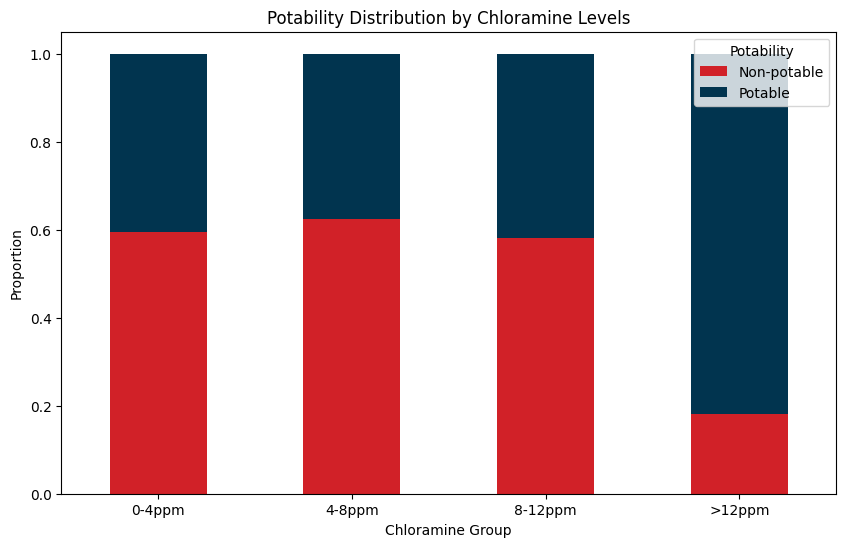

In [7]:
# visualization
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#D12128', '#01344F'])
plt.title('Potability Distribution by Chloramine Levels')
plt.xlabel('Chloramine Group')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(['Non-potable', 'Potable'], title='Potability')
plt.show() 

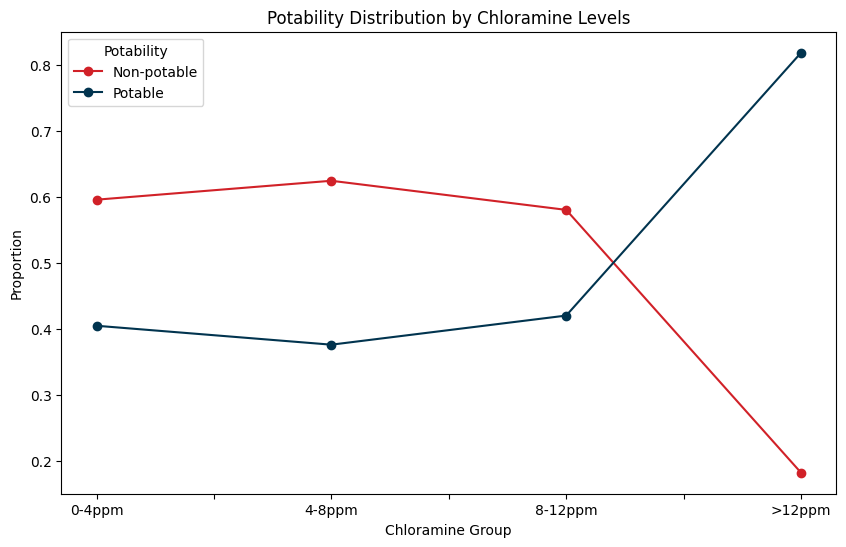

In [8]:
# visualization2 
grouped.plot(kind='line', marker='o', figsize=(10, 6), color=['#D12128', '#01344F'])
plt.title('Potability Distribution by Chloramine Levels')
plt.xlabel('Chloramine Group')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(['Non-potable', 'Potable'], title='Potability')
plt.show() 

**According to the chart, the ratio of probability decreases a bit when chloramine levels exceed 4 ppm, but gradually increases when exceed 8ppm. However, some water samples are still marked as potable despite high chloramine levels, suggesting that we need to consider other factors, such as water treatment and adjustment processes, that may influence chloramine levels.**

## How does different levels of sulfate affect water potability?

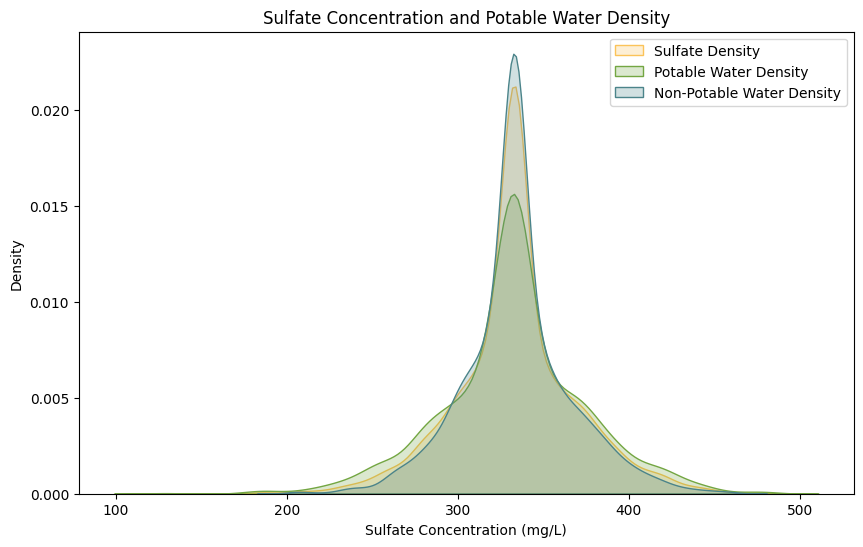

In [13]:
# visualization
plt.figure(figsize=(10, 6))

# kdeplot about sulfate density
sns.kdeplot(df['Sulfate'], color='#FBC359', label='Sulfate Density', fill=True)

# kdeplot about potable density
sns.kdeplot(df[df['Potability'] == 1]['Sulfate'], color='#73A642', label='Potable Water Density', fill=True)
sns.kdeplot(df[df['Potability'] == 0]['Sulfate'], color='#4B848A', label='Non-Potable Water Density', fill=True)
# add title and label
plt.title('Sulfate Concentration and Potable Water Density')
plt.xlabel('Sulfate Concentration (mg/L)')
plt.ylabel('Density')
plt.legend()
plt.show()

**Based on the chart, the three curves (sulfate density, potable water samples, and non-potable water samples) are almost overlapping, particularly around the peak at 330 mg/L. This suggests that, in this dataset, sulfate concentration does not appear to significantly impact the potability of the water.**

## What is the relationship between the distribution of Turbidity and potability?

In [44]:
print('Mean Turbidity value:', df['Turbidity'].mean())
print('Median Turbidity value:', df['Turbidity'].median())
print('Standard Deviationof Turbidity value:', df['Turbidity'].std())

# group potability by Turbidity
turbidity_stats = df.groupby('Potability')['Turbidity']
turbidity_stats.mean()

Mean Turbidity value: 3.966786169791058
Median Turbidity value: 3.955027562993039
Standard Deviationof Turbidity value: 0.7803824084854124


Potability
0    3.965800
1    3.968328
Name: Turbidity, dtype: float64

**The turbidity values in potable and non-potable water samples are very similar, with nearly identical mean and median values. This suggests that the turbidity does not have a significant impact on water potability. The overall distribution of turbidity is also quite concentrated, showing no extreme variation.**

## Which variable has a strong correalation with potability?

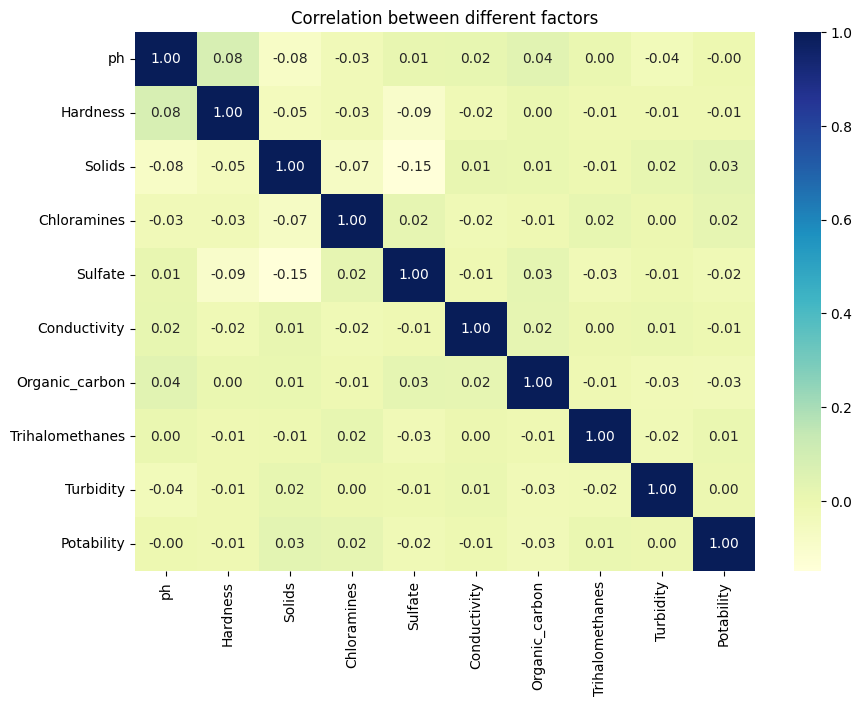

In [56]:
corr = df.drop('Chloramine_Group',axis=1).corr()

# visulization
plt.figure(figsize=(10, 7))   
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title('Correlation between different factors')
plt.show()

**The correlation between each factor is very weak.**

## **Inferential Analysis**

## Does organic carbon siginificantly affect water potability?

In [ ]:
'''
Null Hypothesis(H0): Organic Carbon doesn't affect water potability siginificantly.
Alternative Hypothesis(H1): Organic Carbon affects water potability siginificantly.
'''

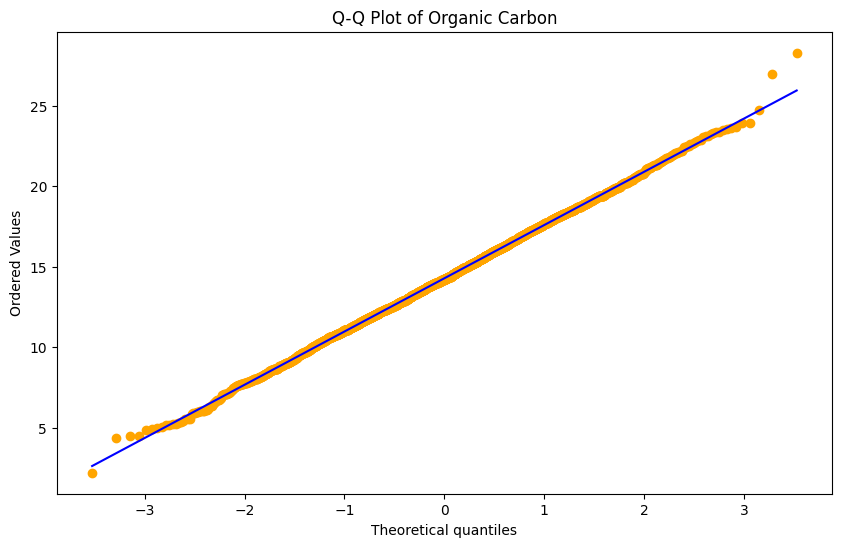

In [18]:
# plot Q-Qplot to test noamality
plt.figure(figsize=(10, 6))
# set color
line_color = 'blue'  
marker_color = 'orange'     

# Q-Q plot
qq_plot = stats.probplot(df['Organic_carbon'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Organic Carbon')

# modify color
plt.gca().get_lines()[0].set_color(marker_color)  
plt.gca().get_lines()[1].set_color(line_color)    

plt.show()

In [5]:
# Based on the Q-Q plot, the data points closely follow the straight line, indicating that the distribution of organic carbon approximates normality. 
# Therefore, it is appropriate to use the independent samples t-test.

# groupy the data based on potability
potable = df[df['Potability'] == 1]['Organic_carbon']
non_potable = df[df['Potability'] == 0]['Organic_carbon']

# t-test
t_stat, p_value = ttest_ind(potable, non_potable)

alpha = 0.05
if p_value < 0.05:
    print('Reject null hypothesis. Organic Carbon affect water potability siginificantly.')
else:
    print('Fail to reject null hypothesis. Organic Carbon do not affect water potability siginificantly.')

Fail to reject null hypothesis. Organic Carbon do not affect water potability siginificantly.


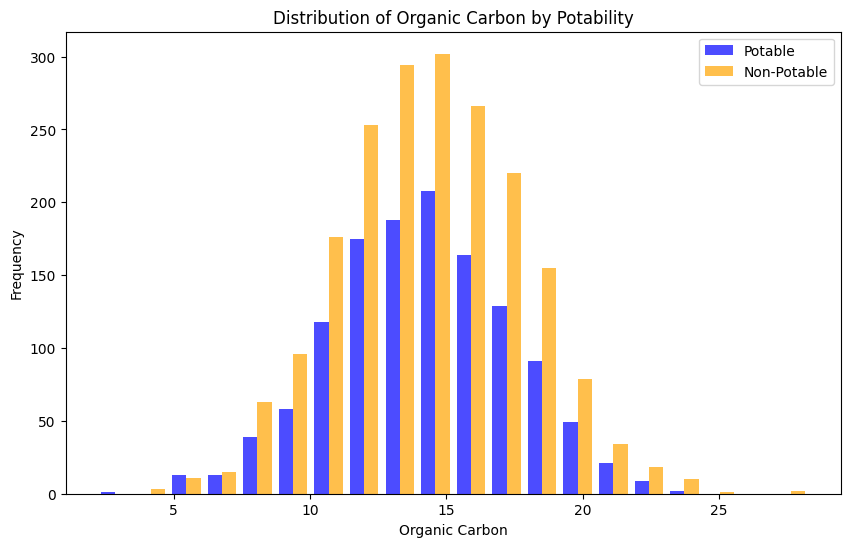

In [6]:
plt.figure(figsize=(10, 6))
plt.hist([potable, non_potable], bins=20, color=['blue', 'orange'], label=['Potable', 'Non-Potable'], alpha=0.7)
plt.title('Distribution of Organic Carbon by Potability')
plt.xlabel('Organic Carbon')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Organic Carbon does not show a strong or clear distinction between potable and non-potable water.**

## Is there a siginificant relationship between Trihalomethanes(THMs) and potability?

In [ ]:
'''
Null Hypothesis(H0): There is no siginificant relationship between Trihalomethanes(THMs) and potability.
Alternative Hypothesis(H1): There is a siginificant relationship between Trihalomethanes(THMs) and potability.
Logic regression is appropriate for this analysis because it allows us to assess the relationship between Trihalomethanes (continuous variable) and potability (binary variable).
'''

In [7]:
X = df['Trihalomethanes']  
y = df['Potability']  

# add constant
X = sm.add_constant(X)

# fit the model
model = sm.Logit(y, X)
result = model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.668774
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Potability   No. Observations:                 3276
Model:                          Logit   Df Residuals:                     3274
Method:                           MLE   Df Model:                            1
Date:                Wed, 21 Aug 2024   Pseudo R-squ.:               3.546e-05
Time:                        10:20:06   Log-Likelihood:                -2190.9
converged:                       True   LL-Null:                       -2191.0
Covariance Type:            nonrobust   LLR p-value:                    0.6934
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5063      0.155     -3.263      0.001      -0.811      -0.202
Trihalomethanes     0.0009      0.002      0.394      0.693      -0.004       0.005
===================================================================================
"""

In [ ]:
'''
The p-value for the coefficient is greater than 0.05, which means we fail to reject the null hypothesis;
There is no siginificant relationship between Trihalomethanes(THMs) and potability.
'''

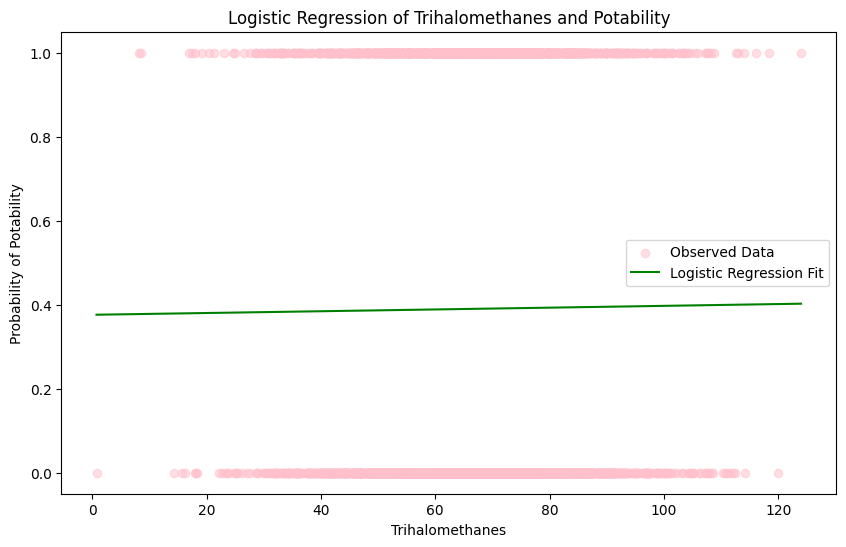

In [10]:
# visulization
X_plot = np.linspace(X['Trihalomethanes'].min(), X['Trihalomethanes'].max(), 100)
X_plot = sm.add_constant(X_plot)

# predict y
y_plot = result.predict(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(df['Trihalomethanes'], df['Potability'], color='pink', alpha=0.5, label='Observed Data')
plt.plot(X_plot[:, 1], y_plot, color='green', label='Logistic Regression Fit')
plt.title('Logistic Regression of Trihalomethanes and Potability')
plt.xlabel('Trihalomethanes')
plt.ylabel('Probability of Potability')
plt.legend()
plt.show()

**From the image, logistic regression isn't the good model to model this data.**

### Recommendations：

#### 1. ****Continuous Monitoring and Optimization of Water Quality Parameters****:
   - Since most pH values are around 7, and most water samples fall within the WHO-recommended range of 6.5 to 8.5, it is recommended to maintain regular pH monitoring to ensure water quality remains within this range. 

#### 2. ****Focus on the Management and Adjustment of Chloramine Levels****:
   - The analysis suggests that the potability of water may decrease when chloramine levels exceed 3 ppm, even though some water samples are still marked as potable at higher chloramine levels. It is recommended to strictly control chloramine levels and assess other factors in the water treatment process (such as water adjustment and treatment processes) to ensure the safety and reliability of water quality.

### Summary of Hypothesis Testing

#### 1. ****Is organic carbon significantly affect water potability?****:
   - Null Hypothesis(H0): Organic Carbon doesn't affect water potability siginificantly.
   - Alternative Hypothesis(H1): Organic Carbon affect water potability siginificantly.
   - Result:Fail to reject null hypothesis. Organic Carbon doesn't affect water potability siginificantly.
    
#### 1. ****Is there a significant relationship between Trihalomethanes(THMs) and potability?****:
   - Null Hypothesis(H0): There is no siginificant relationship between Trihalomethanes(THMs) and potability.
   - Alternative Hypothesis(H1): There is a siginificant relationship between Trihalomethanes(THMs) and potability.
   - Result:The p-value for the coefficient is greater than 0.05, which means we fail to reject the null hypothesis; There is no siginificant relationship between Trihalomethanes(THMs) and potability.
     